# µSAM - point prompts
Stuart in his third datarelease provided only points for cells.. Lets see what we can do with it

In [1]:
import sys, os; sys.path += [os.path.join(os.path.expanduser('~'), 'thesis')]  # NOTE hardcoded project root to find shared util modules

import os
import itertools as it
import json

import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt

import micro_sam
from micro_sam import instance_segmentation, util

from util.label_studio_converter__brush import mask2rle
from util.plot import *

In [2]:
image = plt.imread("../data/third/1.jpg")

_annot = json.load(open('../data/third/annotations.json'))

def preprocess_point(annot):
  '''
    returns: dict: image → numpy instance segmentation mask
  '''

  out = pd.DataFrame()

  for result in annot[0]['annotations'][0]['result']:
    h,w = result['original_height'], result['original_width']
    # rot = result['image_rotation]

    x = result['value']['x']/100 * w
    y = result['value']['y']/100 * h
    s = result['value']['width']

    i = result['to_name']

    out = pd.concat([out, pd.DataFrame(dict(
      x=[x],
      y=[y],
    ))], ignore_index=True)

  return out

points = preprocess_point(_annot)
points

x            y
0       29.988146    75.684370
1       51.408251    64.260314
2       55.692272    32.844160
3       19.992098    47.124230
4        8.568042    29.988146
...           ...          ...
1761  1141.864665  1526.912683
1762  1108.111773  1480.177909
1763  1126.286407  1494.457979
1764  1346.978394  1529.509059
1765   747.836235  1026.770633

[1766 rows x 2 columns]

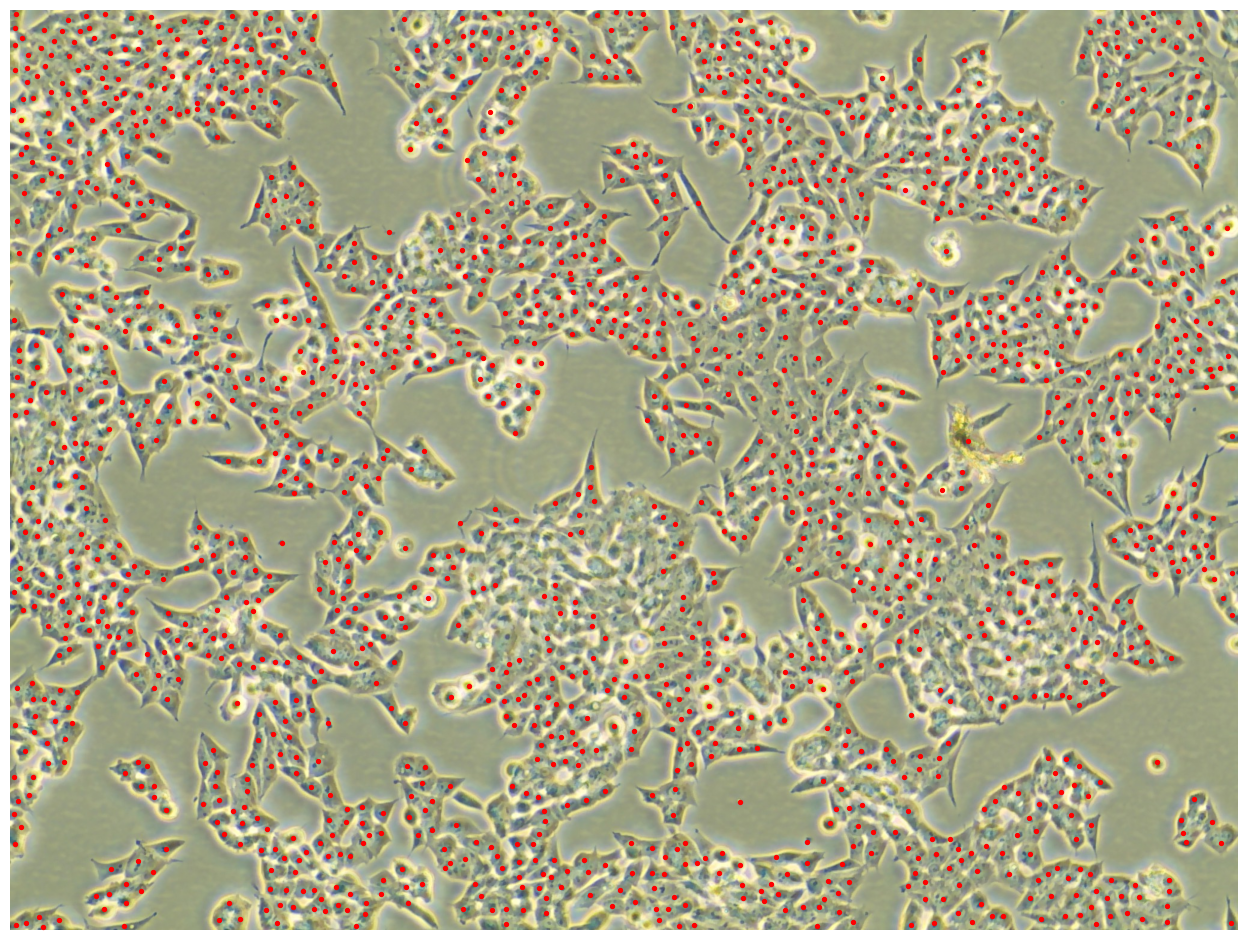

In [3]:

def plot_points(image, points):
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,10))
  plt.tight_layout()
  ax.axis('off')

  ax.imshow(image)
  ax.scatter(points.x, points.y, s=8, c='red', marker='o')

plot_points(image, points)

---

In [4]:

_cache_dir = os.path.join(os.path.expanduser('~'), '.cache', 'micro-sam')

dataset_id = 'third'

model = 'vit_h'
iou_thresh = 0.88

cache_dir = os.path.join(_cache_dir, dataset_id)
[os.makedirs(os.path.join(cache_dir, d), exist_ok=True) for d in 'embed masks rles'.split(' ')];

In [5]:
imgid = 1

predictor = util.get_sam_model(model_type=model)

pImage = f"../data/{dataset_id}/{imgid}.jpg"
pEmbed = f"{cache_dir}/embed.{model}.{imgid}.zarr"


print('LOADING'  if os.path.exists(pEmbed) else
      'WRITING', f'embedding cache at {pEmbed}')

embeddings = util.precompute_image_embeddings(
  predictor, image, ndim = 2, save_path=pEmbed,
  tile_shape=(tile:=1024, tile), halo=(halo:=tile//4, halo)
)

LOADING embedding cache at /gpfs/space/home/eckhardt/.cache/micro-sam/third/embed.vit_h.1.zarr


In [6]:

amg = instance_segmentation.TiledAutomaticMaskGenerator(predictor)
amg.initialize(image, embeddings, verbose=True)
insts_amg = amg.generate(pred_iou_thresh=iou_thresh)  # can try different

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:11<02:51, 11.46s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:12<01:14,  5.34s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:13<00:43,  3.36s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:14<00:29,  2.42s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:15<00:21,  1.92s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:16<00:16,  1.61s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:17<00:12,  1.43s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [00:18<00:10,  1.29s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [00:19<00:08,  1.19s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [00:20<00:06,  1.11s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [00:21<00:05,  1.07s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [00:22<00:04,  1.08s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [00:23<00:03,  1.16s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [00:24<00:02,  1.13s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [00:25<00:01,  1.09s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:26<00:00,  1.04s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:26<00:00,  1.68s/it]


Compute masks for tile:  25%|██▌       | 1/4 [00:26<01:20, 26.98s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:00<00:14,  1.04it/s]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:01<00:13,  1.05it/s]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:02<00:12,  1.03it/s]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:03<00:11,  1.02it/s]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:04<00:10,  1.03it/s]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:05<00:09,  1.01it/s]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:06<00:09,  1.01s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [00:07<00:08,  1.01s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [00:08<00:06,  1.00it/s]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [00:09<00:05,  1.03it/s]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [00:10<00:04,  1.01it/s]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [00:11<00:04,  1.03s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [00:13<00:03,  1.04s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [00:14<00:02,  1.04s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [00:15<00:01,  1.02s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:15<00:00,  1.00it/s]


Compute masks for tile:  50%|█████     | 2/4 [00:43<00:41, 20.56s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:01<00:11,  1.18it/s]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:03<00:10,  1.15it/s]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:04<00:09,  1.12it/s]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:05<00:08,  1.13it/s]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:06<00:07,  1.13it/s]

Predict masks for point grid prompts:  50%|█████     | 8/16 [00:07<00:07,  1.14it/s]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [00:07<00:06,  1.14it/s]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [00:08<00:05,  1.15it/s]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [00:09<00:04,  1.16it/s]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [00:12<00:00,  1.16it/s]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]


Compute masks for tile:  75%|███████▌  | 3/4 [00:57<00:17, 17.56s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:00<00:12,  1.17it/s]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:01<00:12,  1.14it/s]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:02<00:11,  1.13it/s]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:03<00:10,  1.11it/s]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:04<00:09,  1.11it/s]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:05<00:09,  1.10it/s]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:06<00:08,  1.09it/s]

Predict masks for point grid prompts:  50%|█████     | 8/16 [00:07<00:07,  1.09it/s]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [00:08<00:06,  1.11it/s]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [00:08<00:05,  1.13it/s]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [00:09<00:04,  1.12it/s]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [00:10<00:03,  1.12it/s]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [00:11<00:02,  1.11it/s]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [00:12<00:01,  1.10it/s]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [00:13<00:00,  1.09it/s]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

Predict masks for point grid prompts: 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]


Compute masks for tile: 100%|██████████| 4/4 [01:11<00:00, 16.39s/it]

Compute masks for tile: 100%|██████████| 4/4 [01:11<00:00, 17.91s/it]

In [7]:

masks = instance_segmentation.mask_data_to_segmentation(
  insts_amg, shape=image.shape, with_background=True)        ## TODO: what does this function do with overlapping instances?

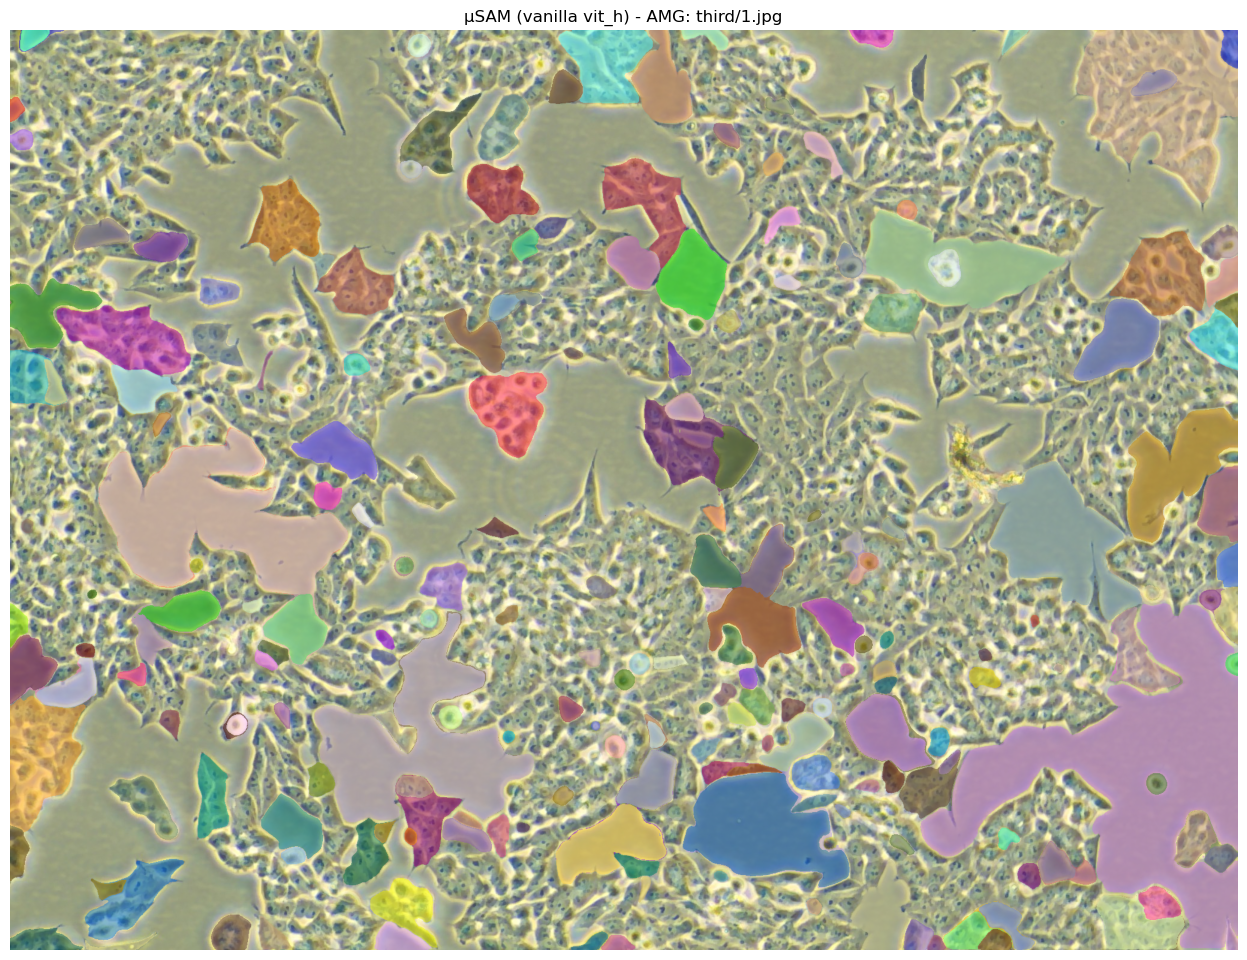

In [8]:
colors = colorcet.m_glasbey.colors

fig, ax = plt.subplots(1,1, figsize=(13, 10))
plt.tight_layout()

ax.set_title(f"µSAM (vanilla vit_h) - AMG: third/1.jpg")
ax.axis('off')

ax.imshow(skimage.color.label2rgb(
  masks, image, saturation=1, bg_color=None, alpha=0.5, colors=colors)
)

In [9]:

_points = points
points = points.to_numpy()

insts_points = [
  micro_sam.prompt_based_segmentation.segment_from_points(
    predictor=predictor,
    image_embeddings=embeddings,
    points=np.array([[x,y]]),
    labels=np.array([1]),
  )[0] for x,y in points
]

masks = np.zeros(image.shape[:2])
for i, inst in enumerate(insts_points):
  masks[inst] = i+1

/gpfs/space/home/eckhardt/.micromamba/envs/micro-sam/lib/python3.11/site-packages/micro_sam/prompt_based_segmentation.py:162: UserWarning: 1 points were not in the tile and are dropped
  warnings.warn(


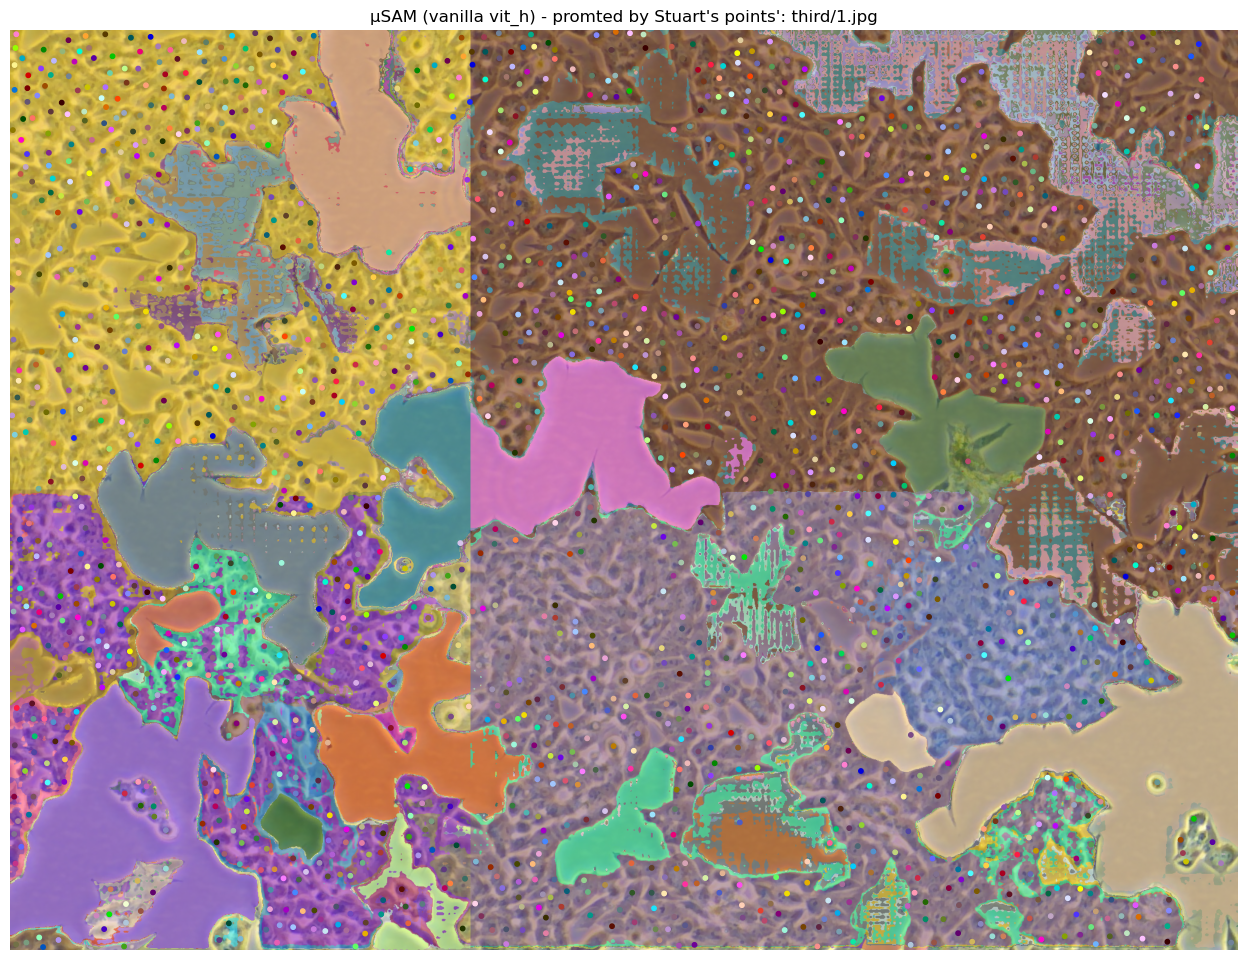

In [10]:

colors = colorcet.m_glasbey.colors
colors = list(it.islice(it.cycle(colors), len(points)))

fig, ax = plt.subplots(1,1, figsize=(13, 10))
plt.tight_layout()

ax.set_title(f"µSAM (vanilla vit_h) - promted by Stuart\'s points': third/1.jpg")
ax.axis('off')

ax.imshow(skimage.color.label2rgb(
  masks, image, saturation=1, bg_color=None, alpha=0.5, colors=colors)
)

ax.scatter(points[:,0], points[:,1], s=10, c=colors, marker='o')